In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from torch.autograd import Variable
from torchvision.utils import save_image, make_grid

plt.ion()

In [ ]:
class Generator(nn.Module):

    def __init__(self):
        super(Generator, self).__init__()
        self.block = nn.Sequential(

            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2,True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2,True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2,True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2,True),
            
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.block(x)
        #print(x.size())
        return x

In [8]:
class Discriminator(nn.Module):

    def __init__(self):
        super(Discriminator, self).__init__()
        self.block = nn.Sequential(
            #nn.Dropout2d(0.2),
            nn.Conv2d(3, 16, kernel_size=(3,3),padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(0.2,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
 
            nn.Conv2d(16, 32, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
 
            nn.Conv2d(32, 64, kernel_size=(3,3),padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=(3,3),padding=1, bias=False),            
            nn.AvgPool2d(kernel_size=(4,4)),
            #nn.Linear(512,2)
        )
        self.out = nn.Sequential(nn.Linear(256,1),nn.Sigmoid())
    def forward(self, x):
        x1 = self.block(x)
        x1 = x1.view(x.size(0),-1)
        x = self.out(x1)
        #print(x.size())
        return x

gen_model = Generator().cuda()
dis_model = Discriminator().cuda()



In [4]:
avDev = torch.device("cuda:0")

In [7]:
def dataloaders(path=r"./Data set/train/"):
    transforms_list = transforms.Compose([
        transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor()
    ])
    
    dataset = datasets.ImageFolder(path, transforms_list)

    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    return dataloader


def generate_images(gen_model, epoch_no, batch_size=16):
    gen_inp = torch.randn(batch_size, 100, 1, 1, device=avDev)
    gen_inp = gen_inp.cuda()
    fake_images = gen_model(gen_inp)
    fake_images = fake_images.cpu().detach()
    show(make_grid(fake_images, nrow=4))

    
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

def show(img):
    npimg = img.numpy()
    plt.figure(figsize = (8,8))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest', aspect='auto')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLE OF TRUE IMAGES..
SAMPLES OF GENERATED IMAGES..
Epoch 0
Generator and Discrimator average loss: 0.8761797224481901, 0.6877955322464308


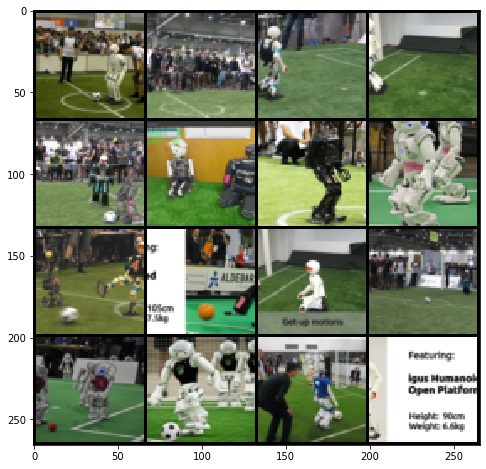

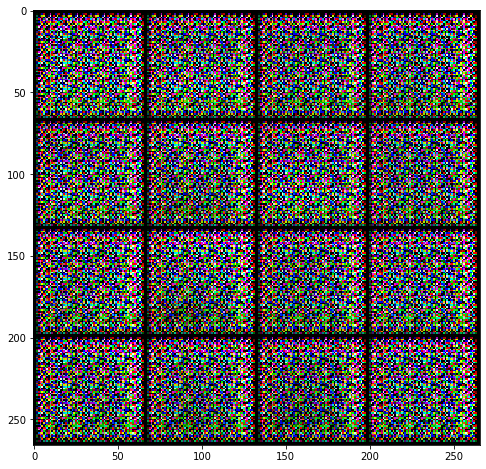

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 10
Generator and Discrimator average loss: 0.7416749894618988, 0.6916298394401869


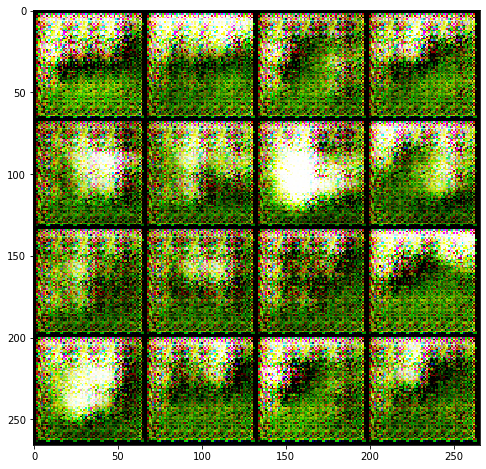

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 20
Generator and Discrimator average loss: 0.8676134993632635, 0.6501084913810095


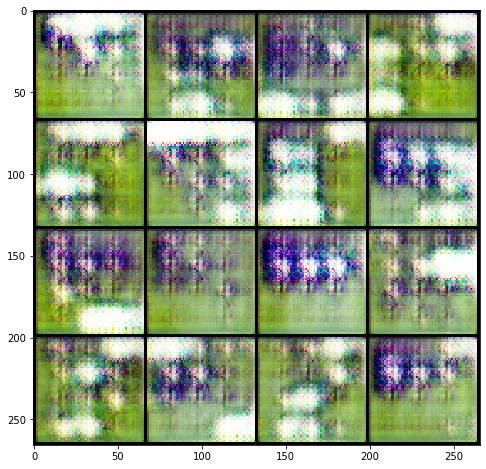

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 30
Generator and Discrimator average loss: 1.0825720032056172, 0.545395673563083


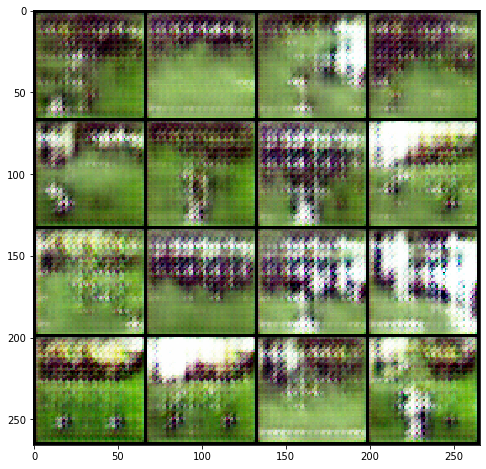

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 40
Generator and Discrimator average loss: 1.5630583837628365, 0.3899047163625558


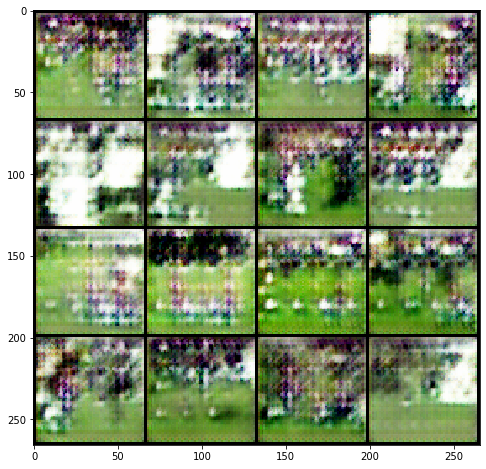

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 50
Generator and Discrimator average loss: 1.5930864388744037, 0.41610619115332764


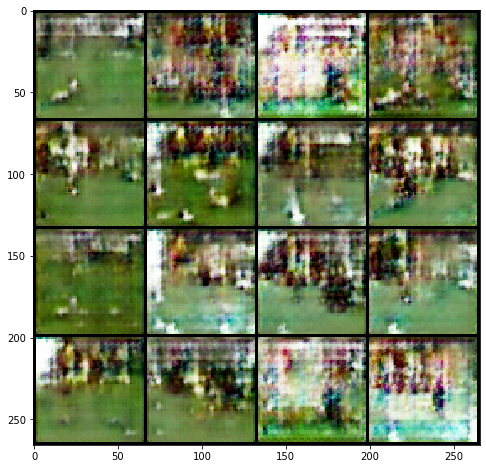

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 60
Generator and Discrimator average loss: 1.7683391720056534, 0.3817521755894025


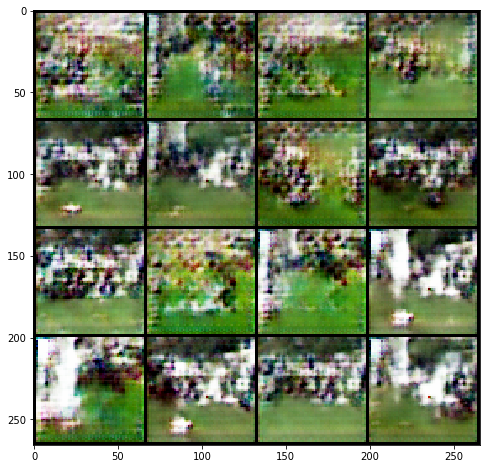

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 70
Generator and Discrimator average loss: 1.8302627330025036, 0.41452453037103015


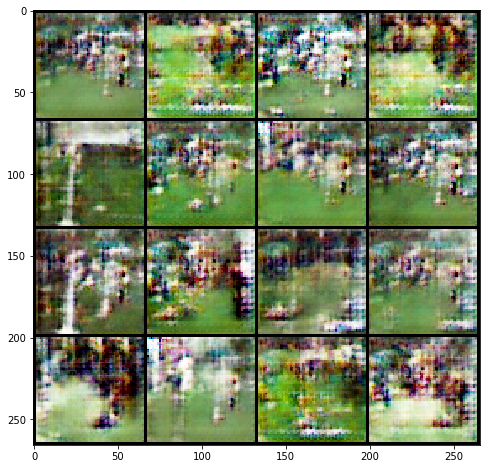

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 80
Generator and Discrimator average loss: 1.8477979401747386, 0.387468907982111


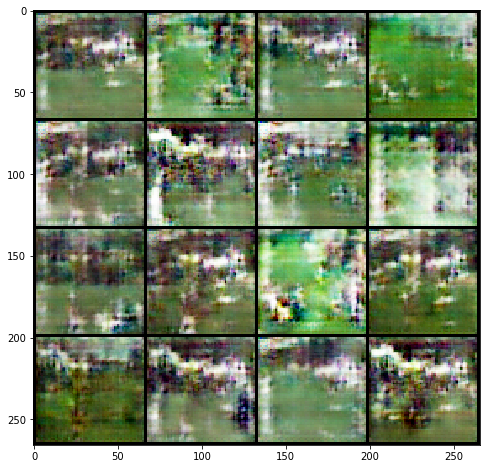

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 90
Generator and Discrimator average loss: 2.000949199000994, 0.3503051170458396


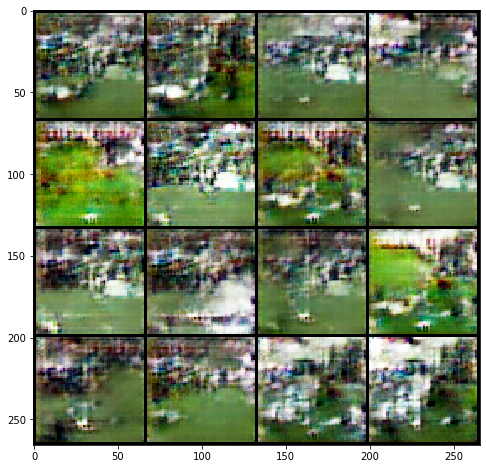

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 100
Generator and Discrimator average loss: 2.050617530941963, 0.3146026221414407


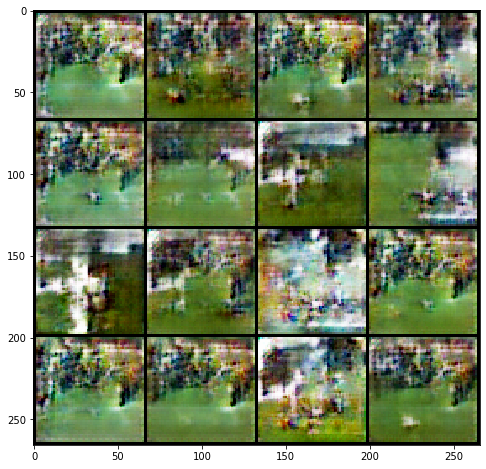

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 110
Generator and Discrimator average loss: 2.0781658242146173, 0.39032194515069324


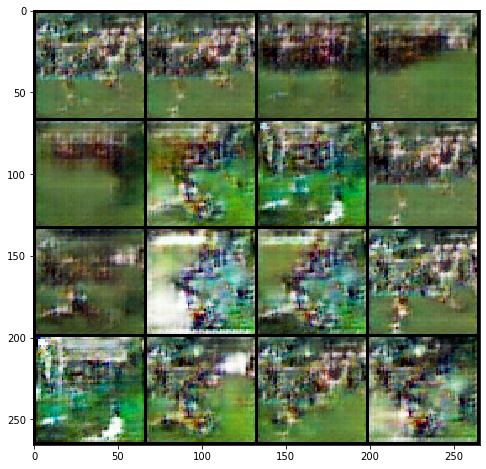

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 120
Generator and Discrimator average loss: 2.1856816112995148, 0.392246392245094


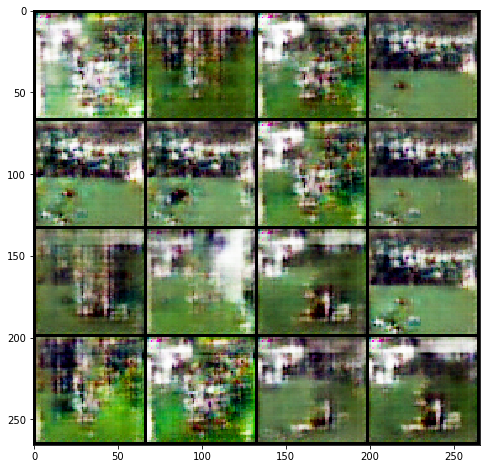

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 130
Generator and Discrimator average loss: 2.0185016989707947, 0.40043241903185844


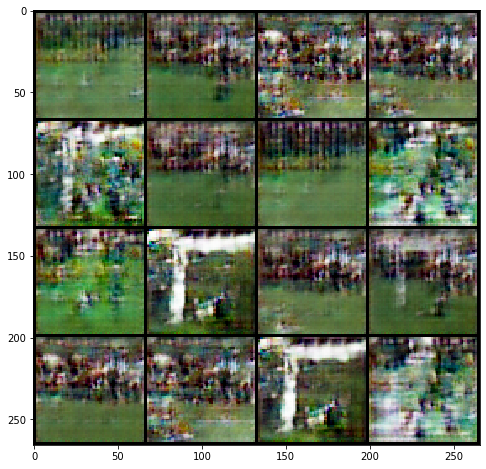

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 140
Generator and Discrimator average loss: 2.2472126657764115, 0.36219293903559446


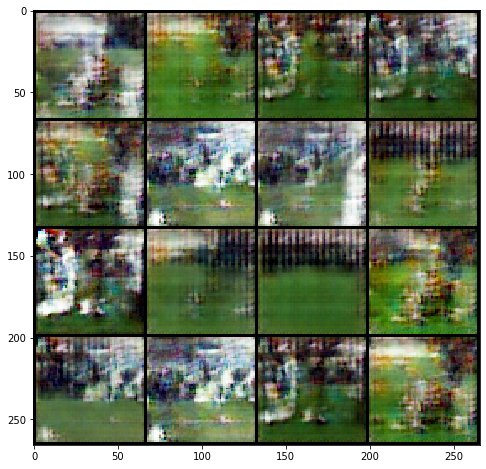

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 150
Generator and Discrimator average loss: 2.3617046425739923, 0.32950397798170644


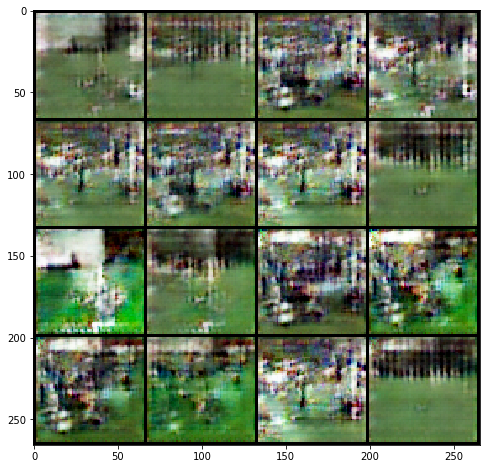

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 160
Generator and Discrimator average loss: 2.6238401333491006, 0.33376450029512245


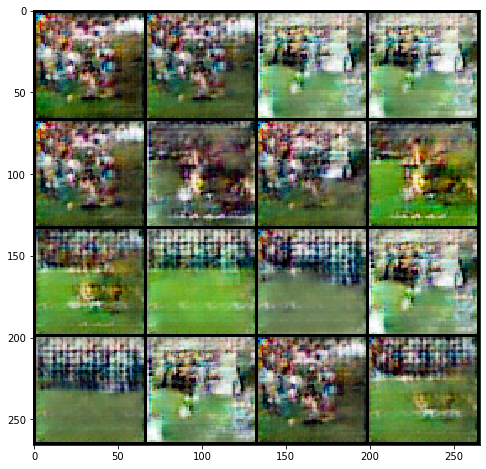

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 170
Generator and Discrimator average loss: 2.534650598963102, 0.274126092903316


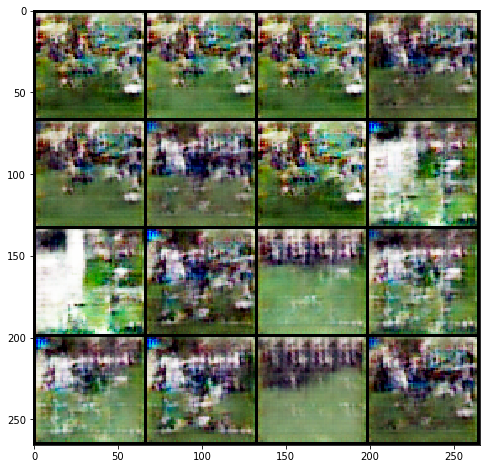

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 180
Generator and Discrimator average loss: 2.701972186565399, 0.28642086250086624


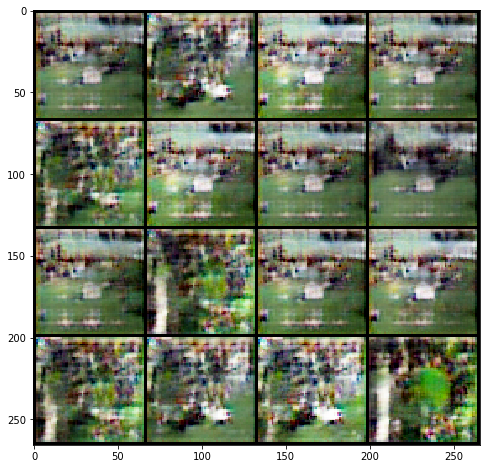

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 190
Generator and Discrimator average loss: 2.8162814055879912, 0.30141288693994284


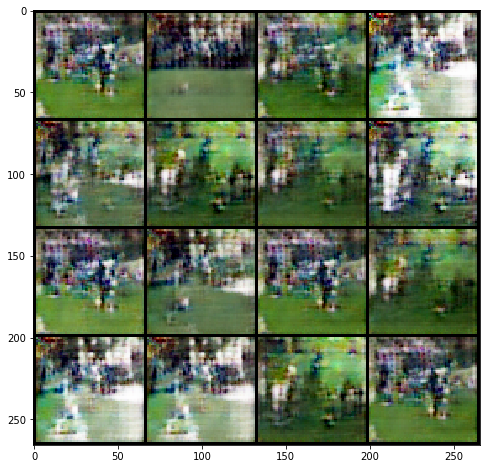

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 200
Generator and Discrimator average loss: 2.9219682614008584, 0.26480064867064357


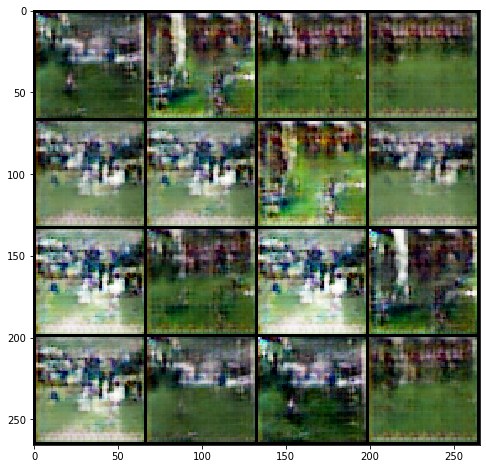

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 210
Generator and Discrimator average loss: 2.2903594374656677, 0.33001088816672564


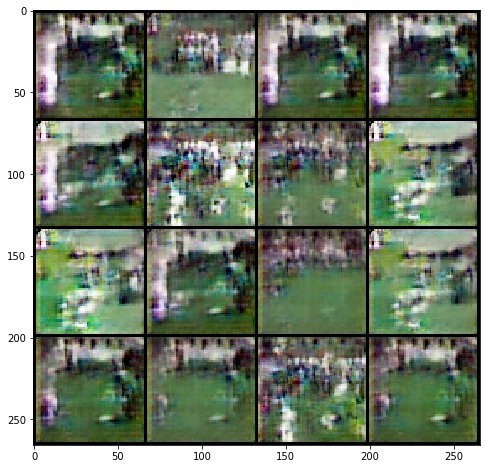

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 220
Generator and Discrimator average loss: 2.986602599422137, 0.3682202848916252


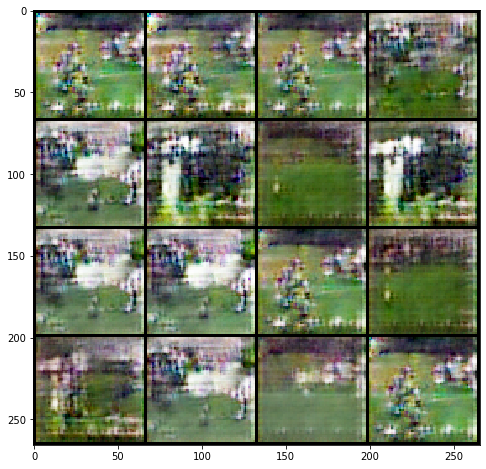

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 230
Generator and Discrimator average loss: 2.798116316397985, 0.31106654182076454


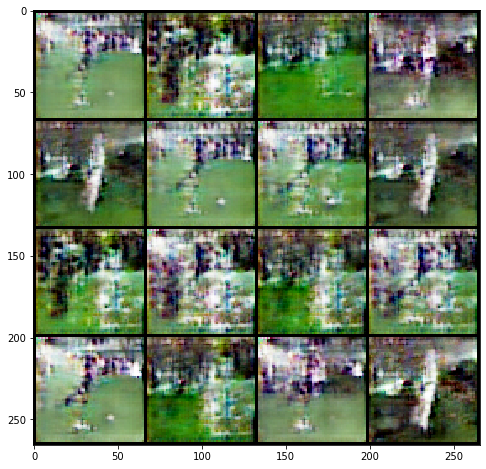

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SAMPLES OF GENERATED IMAGES..
Epoch 240
Generator and Discrimator average loss: 2.6472318271795907, 0.30840783659368753


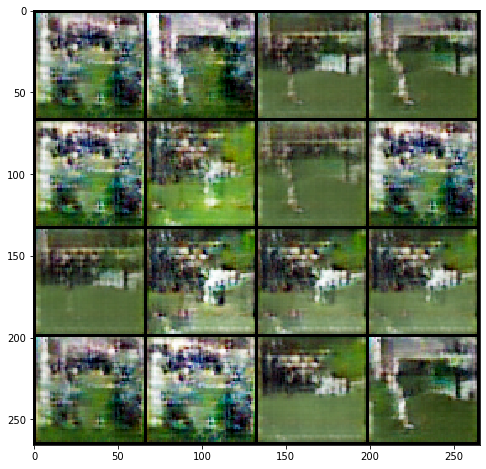

In [10]:
if __name__ == "__main__":

    image_size = 64
    batch_size = 16
    n_epochs = 250

    gen_lr = 1e-3
    dis_lr = 1e-4

    gen_model = Generator().cuda()
    dis_model = Discriminator().cuda()

    optimizer_gen = optim.Adam(gen_model.parameters(), lr=gen_lr, betas=(0.5, 0.999))
    optimizer_dis = optim.Adam(dis_model.parameters(), lr=dis_lr, betas=(0.5, 0.999))

    true_labels = 0.0   # CHANGE TO ZERO TO FLIP LABELS
    
    d_true_labels = Variable(torch.Tensor(batch_size).fill_(true_labels), requires_grad=False).cuda()
    g_labels = Variable(torch.Tensor(batch_size).fill_(1.0-true_labels), requires_grad=False).cuda()
      
    place_holder_true = np.ones([batch_size]) * true_labels
    place_holder_false = np.ones([batch_size]) * (1.0-true_labels)

    loss = nn.BCELoss().cuda()

    loss_list = []

    disc_dataloader = dataloaders()

    for epoch in range(n_epochs):

        total = len(disc_dataloader) * batch_size * 2
        correct_pos = 0.0
        correct_neg = 0.0
        gen_acc = 0.0

        disc_loss_epoch = 0
        gen_loss_epoch = 0

        #for batch_id, (true_images,_) in enumerate(disc_dataloader, 0): # For MNIST Example
        for batch_id, (true_images,_) in enumerate(disc_dataloader, 0):
            if epoch==0 and batch_id == 0:
                sample_true = true_images
            gen_model.train()
            dis_model.train()

            optimizer_dis.zero_grad()
            gen_inp_1 = torch.randn(batch_size, 100, 1, 1, device=avDev, requires_grad=False)

            # gen_inp = gen_inp.to(device)
            fake_images = gen_model(gen_inp_1)
            # TRAINING DISCRIMINATOR

            true_images = true_images.cuda()
            
            d_true_loss = loss(dis_model(true_images).view(-1), d_true_labels)
            d_fake_loss = loss(dis_model(fake_images.detach()).view(-1), g_labels)  # Have to detach from graph for some reason

            d_loss = (d_true_loss + d_fake_loss) / 2

            d_true_loss.backward()
            d_fake_loss.backward()
            optimizer_dis.step()

            # TRAINING GENERATOR
            optimizer_gen.zero_grad()

            # CREATING A BATCH OF RANDOM NOISE IN [0,1] FOR GENERATOR INPUT
            gen_loss = loss(dis_model(fake_images).view(-1), d_true_labels)
            gen_loss.backward()
            optimizer_gen.step()

            gen_loss_epoch += gen_loss.item()
            disc_loss_epoch += d_loss.item()




        
        loss_list.append((gen_loss_epoch/len(disc_dataloader),disc_loss_epoch/len(disc_dataloader)))
        
        if epoch==0:
          print("SAMPLE OF TRUE IMAGES..")
          true_images = sample_true.cpu().detach()
          show(make_grid(true_images, nrow=4))
          
        if epoch%10==0:
          print("SAMPLES OF GENERATED IMAGES..")
          print("Epoch {}".format(epoch))
          print("Generator and Discrimator average loss: {}, {}".
              format(gen_loss_epoch / len(disc_dataloader), disc_loss_epoch / len(disc_dataloader)))
          generate_images(gen_model, epoch, 16)
          plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


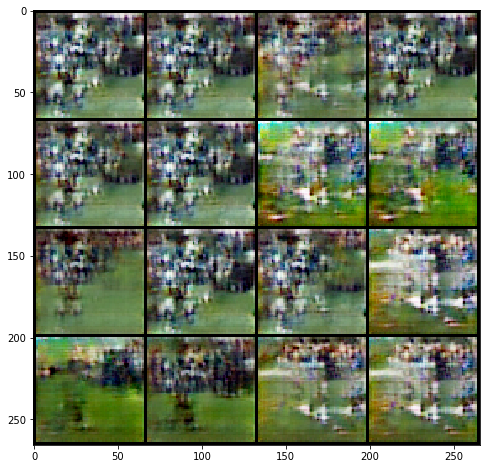

In [50]:
generate_images(gen_model, epoch, 16)
